# Проект. Сборный проект - 1. Исследование игровых платформ

## Глава 0. Входные данные
### Описание проекта
Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».  

#### Путь к файлу:
 - /datasets/games.csv

#### Описание данных таблицы
`Name` — название игры  
`Platform` — платформа  
`Year_of_Release` — год выпуска  
`Genre` — жанр игры  
`NA_sales` — продажи в Северной Америке (миллионы долларов)  
`EU_sales` — продажи в Европе (миллионы долларов)  
`JP_sales` — продажи в Японии (миллионы долларов)  
`Other_sales` — продажи в других странах (миллионы долларов)  
`Critic_Score` — оценка критиков (максимум 100)  
`User_Score` — оценка пользователей (максимум 10)  
`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг   компьютерных игр и присваивает им подходящую возрастную категорию.  

Данные за 2016 год могут быть неполными.  

---
## Комментарий от наставника

Хорошее вступление в работу. Можно привести также краткий план проведения самой работы.

---

## Глава 1. Открытие файла с данными и изучение общей информации

Вызовем все необходимые библиотеки для реализации проекта

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math as mt
from scipy import stats as st
from scipy.stats import norm

In [2]:
df = pd.read_csv('/datasets/games.csv')
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


>Присутствуют пропуски в столбцах `Name`, `Platform`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`  
Данные столбца `Year_of_Release` привести к целочисленному формату   
Данные столбца `User_Score` привести из строкового в числовой  
Проверить данные столбца `Critic_Score` на необходимость дробной записи

### Выводы по главе 1:

В данных присутствуют пропуски, необходимо определить природу их возникновения и принципы замены, при необходимости. Привести столбец с годом релиза к целочисленному формату. Названия столбцов привести к нижнему регистру. Изменить формат данных столбцов при необходимости

## Глава 2. Подготовка данных

### Заменим названия столбцов. Преобразуем данные в нужные типы. Обработаем пропуски

Проверим таблицу на дубликаты, используя метод `.duplicated()` и суммировав методом `.sum()`

In [3]:
df.duplicated().sum()

0

Приведем названия столбцов к нижнему регистру

In [4]:
df.columns = [x.lower() for x in df.columns]
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Проверим таблицу на пропуски, используя метод `.isnull()` и суммировав методом `.sum()`

In [5]:
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Найдем пропуски в `name` и `genre`:

In [6]:
df.sort_values(by='genre').tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14108,Railroad Tycoon 3,PC,2003.0,Strategy,0.00,0.03,0.00,0.00,80.0,7.7,E
15384,Order of War,PC,2009.0,Strategy,0.00,0.01,0.00,0.00,69.0,7.3,T
11864,Commandos 2: Men of Courage,XB,2002.0,Strategy,0.05,0.02,0.00,0.00,67.0,8.4,T
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


>Имеем 2 пропуска в `name` и `genre` на 2-х строчках. Заполнить их не сможем по имеющимся данным, в то же время имеют ценность по продажам для платформы GEN  
Для столбцов `year_of_release`, `critic_score`, `user_score`, `rating` оставим пропуски как есть

Напишем цикл для замены пропусков в `year_of_release` на медианы годов выпуска игр по каждой платформе и заменим данные на целочисленные.

In [7]:
for item in df['platform'].unique():
    filter_flags = df['year_of_release'].isna() & (df['platform'] == item)
    df.loc[filter_flags, 'year_of_release'] = df.loc[df['platform'] == item, 'year_of_release'].median()
df['year_of_release'] = df['year_of_release'].astype('int')
df['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16715, dtype: int64

In [8]:
df.isnull().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Проверим значения столбца `name` на уникальность, те самым определим максимальное количество платформ для одной игры

In [9]:
df['name'].value_counts().head(10)

Need for Speed: Most Wanted                12
LEGO Marvel Super Heroes                    9
Ratatouille                                 9
FIFA 14                                     9
Madden NFL 07                               9
LEGO Star Wars II: The Original Trilogy     8
FIFA 15                                     8
The LEGO Movie Videogame                    8
LEGO Jurassic World                         8
Cars                                        8
Name: name, dtype: int64

Проверим столбцы `platform`, `year_of_Release`, `genre`, `critic_Score`, `user_score`, `rating` на уникальность, используя метод `.unique()` чтобы проверить данные на аномальные значения

In [10]:
[x.unique() for x in (df['platform'], df['year_of_release'], df['genre'], df['critic_score'], df['user_score'], df['rating'])]

[array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
        'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
        'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
        '3DO', 'GG', 'PCFX'], dtype=object),
 array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
        2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
        1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
        1981, 1987, 1980, 1983]),
 array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
        'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
        'Strategy', nan], dtype=object),
 array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
        83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
        71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
        75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       

>Год нужно привести к целочисленному формату, в оценках пользователей присутствуют 'tbd', рейтинг от организации ESRB разобраться со значениями

Согласно источнику в википедии [Рейтинг игр ESRB](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board) имеет следующую классификацию:
 - **«EC» («Early childhood»)** — «Для детей младшего возраста»
 - **«E» («Everyone»)** — «Для всех» (Первоначально "K-A" ("Kids to Adults"))
 - **«E10+» («Everyone 10 and older»)** — «Для всех от 10 лет и старше»
 - **«T» («Teen»)** — «Подросткам»
 - **«M» («Mature»)** — «Для взрослых»
 - **«AO» («Adults Only 18+»)** — «Только для взрослых»
 - **«RP» («Rating Pending»)** — «Рейтинг ожидается»  
 
 Заменим **K-A** на **E**

In [11]:
df['rating'] = df['rating'].replace('K-A', 'E')

Приведем значения столбца `critic_score` к такому же как `user_score` для удобства сравнения

In [12]:
df['critic_score'] = df['critic_score'] / 10

Столбец `critic_score` имеет значения **tbd**("to be determined", "to be defined"), что означает игра еще не имеет рейтинга и будет оценена как только появится достаточно отзывов о игре. Поэтому заменим эти значения на **NaN** и приведем данные к числовому типу, используя `.to_numeric`

In [13]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

### Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец

In [14]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


### Выводы по главе 2:

В столбце `year_of_release` присутствовали пропуски, вероятнее всего образовавшиеся при выгрузке данных, т.к. каждая игра имеет дату релиза, были заменены на медианы резила по каждой платформе. Также возможно возникли пропуски в `name` и `genre`, но они не имеют особого веса, значение всего 2. Пропуски в `critic_score`, `user_score` и `rating` имеют естественную природу возникновения - данных нет для более старых игр.

## Глава 3. Исследовательский анализ данных

### Посчитаем сколько игр выпускалось в разные годы

Составим сводную таблицу по количеству выпущенных игр по годам и построим гистограмму по количеству и график по продажам в каждом году 

In [15]:
games_per_year = df.pivot_table(columns='year_of_release', values='name', aggfunc=['count'])
games_per_year

count                                               ...        \
year_of_release  1980 1981 1982 1983 1984 1985 1986 1987 1988 1989  ...  2007   
name                9   46   53   17   14   14   21   16   15   17  ...  1197   

                                                                  
year_of_release  2008  2009  2010  2011 2012 2013 2014 2015 2016  
name             1457  1476  1302  1161  653  552  582  606  502  

[1 rows x 37 columns]

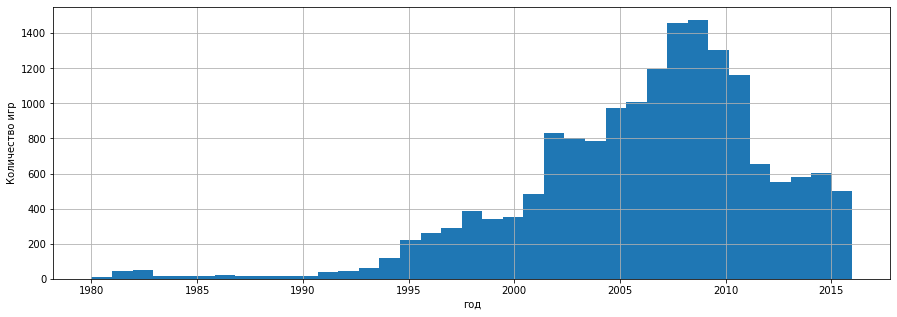

In [16]:
df['year_of_release'].hist(bins=len(df['year_of_release'].unique()), figsize=(15,5)).set(xlabel='год', ylabel='Количество игр');

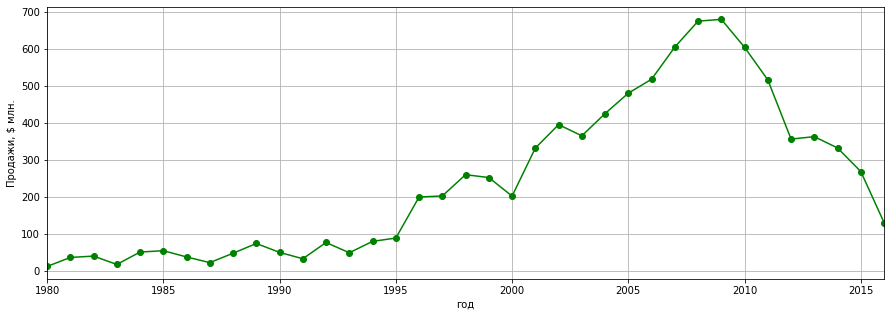

In [17]:
sales_per_year = df.pivot_table(index='year_of_release', values='total_sales', aggfunc=['sum'])
sales_per_year.plot(style='o-',figsize=(15,5), c='g', grid=True, legend=False).set(xlabel='год', ylabel='Продажи, $ млн.');

>По гистограмме видно, что после 2011 года был резкий спад по поличеству выпущенных игр, что подтверждается и продажами. Разработчики перешли от количества к качеству, т.к. пользователи стали более требовательны к качеству игр

### Определим как меняются продажи по платформам и  платформы с наибольшими суммарными продажами. 

Построим сводну таблицу продаж каждой платформы по годам: 

In [18]:
sales_per_platform = df.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
sales_per_platform.fillna('')

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,39.38,5.84,0.27,0.45,0.67,1.94,0.74,0.63,...,,,,,,,,,,
3DO,,,,,,,,,,,...,,,,,,,,,,
3DS,,,,,,,,,,,...,,,,,63.2,51.36,57.76,43.76,27.78,15.14
DC,,,,,,,,,,,...,0.02,0.04,,,,,,,,
DS,,,,,,0.02,,,,,...,146.94,148.65,119.54,85.02,26.18,11.01,1.54,,,
GB,,,,,,,,,1.43,64.97,...,,,,,,,,,,
GBA,,,,,,,,,,,...,3.4,,,,,,,,,
GC,,,,,,,,,,,...,0.27,,,,,,,,,
GEN,,,,,,,,,,,...,,,,,,,,,,


Определим топ-10 платформ по продажам за все время:

In [19]:
top_10_platforms = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
top_10_platforms

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64

In [20]:
top_10_platforms_names = [i for i in top_10_platforms.index]
top_10_platforms_names

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

Построим графики продаж по годам для каждой платформы 

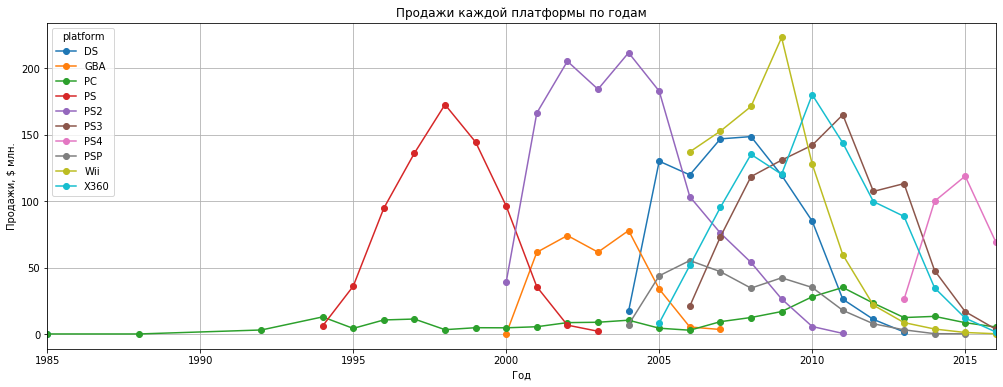

In [21]:
sales_top_10_platform = (df.query('platform == @top_10_platforms_names')
                           .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
                           .plot(style='o-', grid= True, legend=True, figsize=(17,6))
                           .set(xlabel='Год', ylabel='Продажи, $ млн.', title='Продажи каждой платформы по годам')
                            )

Определим продолжительность нахождения каждой платформы на рынке:

In [22]:
years_for_platform = (df.query('platform == @top_10_platforms_names')                        
                       .pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc='sum'))
years_for_platform.reset_index(inplace=True)
years_for_platform = years_for_platform.pivot_table(index='platform', values='year_of_release', aggfunc='count')
years_for_platform

,year_of_release
platform,
DS,11
GBA,8
PC,26
PS,10
PS2,12
PS3,11
PS4,4
PSP,12
Wii,11


Определим за какой характерный срок появляются новые и исчезают старые платформы по медиане продолжительности нахождения каждой платформы на рынке

In [23]:
years_for_platform.median()

year_of_release    11.0
dtype: float64

> Актуальный период для исследований для 2017 года, период с 2012 года, т.е. 5 лет, при том что каждая платформа проводит около 11 лет на рынке, пока ее не заменит следующая модель или попросту выйдет из моды

### Определим платформы лидирующие по продажам, а также потенциально прибыльные платформы.

Построим график продаж по каждой платформе в актуальном периоде(с 2012г.)

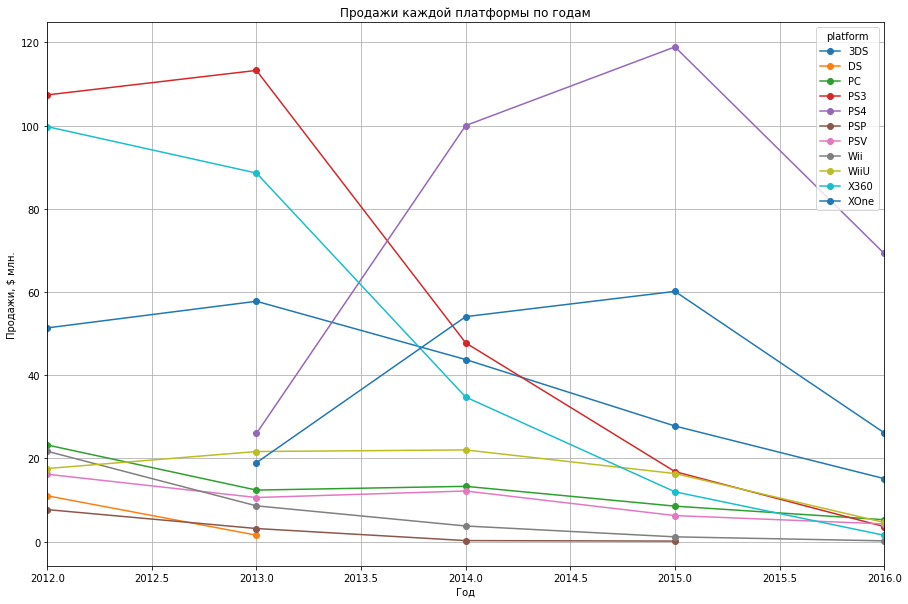

In [24]:
(df.query('year_of_release >= 2012')
   .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
   .plot(style='o-', grid= True, legend=True, figsize=(15,10))
   .set(xlabel='Год', ylabel='Продажи, $ млн.', title='Продажи каждой платформы по годам')
);

>Из всех платформ только PS4, XOne на восходязем тренде, остальные в нисходящем тренде.

Сделаем срез по продажам платформ в 2015г, т.к. данные за 2016г. не полные:

In [25]:
sales_in_2016 = (df.query('year_of_release == 2015')
                   .pivot_table(index='platform', values='total_sales', aggfunc='sum')
                   .sort_values(by='total_sales', ascending=False))
sales_in_2016

,total_sales
platform,
PS4,118.90
XOne,60.14
3DS,27.78
PS3,16.82
WiiU,16.35
X360,11.96
PC,8.52
PSV,6.25
Wii,1.14


Исходя из данных среза и графика выше, делаем вывод о потенциально прибыльных платформах:

In [26]:
actual_platform_list = [i for i in sales_in_2016[:8].index]
actual_platform_list

['PS4', 'XOne', '3DS', 'PS3', 'WiiU', 'X360', 'PC', 'PSV']

### Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам.

ПОстроим сводную таблицу по продажам каждой игры с разбивкой по платформам и посчитаем общие продажи по каждой игре

In [27]:
actual_platform_sales = (df.query('year_of_release >= 2012 and platform == @actual_platform_list')
                     .pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum')
                  )

actual_platform_sales['game_platforms_total'] = actual_platform_sales.sum(axis=1)
actual_platform_sales.sort_values(by='game_platforms_total', ascending=False)

platform,3DS,PC,PS3,PS4,PSV,WiiU,X360,XOne,game_platforms_total
name,,,,,,,,,
Grand Theft Auto V,NaN,1.17,21.05,12.62,NaN,NaN,16.27,5.47,56.58
Call of Duty: Black Ops II,NaN,1.52,13.79,NaN,NaN,0.41,13.68,NaN,29.40
Call of Duty: Ghosts,NaN,0.69,9.36,3.83,NaN,0.35,10.24,2.92,27.39
Call of Duty: Black Ops 3,NaN,0.26,1.69,14.63,NaN,NaN,1.70,7.39,25.67
Minecraft,NaN,NaN,5.27,4.32,1.96,0.67,9.18,2.76,24.16
...,...,...,...,...,...,...,...,...,...
Hanasaku Manimani,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,0.01
Hakuoki: Reimeiroku - Omouhase Kara,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,0.01
Professional Farmer 2016,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,0.01


Пjстроим диаграмму размаха для продаж каждой игры и с разбивкой по платформам:

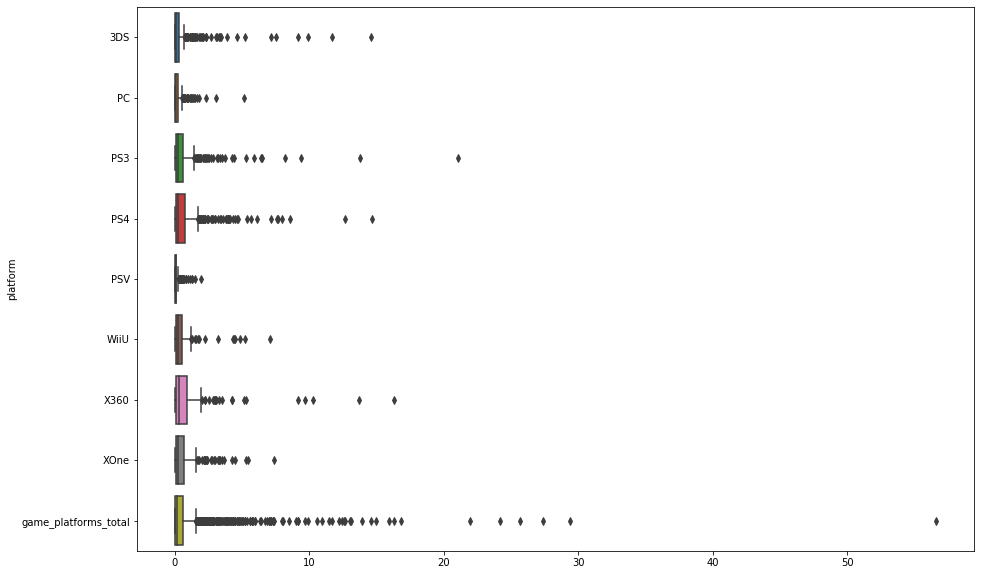

In [28]:
plt.figure(figsize=(15,10))
sns.boxplot(data=actual_platform_sales, orient='h');

Вызвав метод `.describe()` получим данные по каждой платформе и по глобальным продажам

In [29]:
actual_platform_sales.describe()

platform,3DS,PC,PS3,PS4,PSV,WiiU,X360,XOne,game_platforms_total
count,404.000000,250.00000,492.000000,392.000000,412.000000,147.000000,292.000000,247.000000,1514.000000
mean,0.484653,0.25060,0.586972,0.801378,0.120000,0.559116,0.810068,0.645020,0.917351
std,1.374274,0.49464,1.464141,1.609456,0.202882,1.058836,1.712069,1.036139,2.736916
min,0.010000,0.01000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.040000,0.03000,0.050000,0.060000,0.020000,0.080000,0.100000,0.060000,0.040000
50%,0.110000,0.08000,0.200000,0.200000,0.050000,0.220000,0.310000,0.220000,0.150000
75%,0.310000,0.24000,0.610000,0.730000,0.120000,0.525000,0.870000,0.685000,0.640000
max,14.600000,5.14000,21.050000,14.630000,1.960000,7.090000,16.270000,7.390000,56.580000


>Исходя из данных можно сделать выводы:
- по медианым и средним значениям продаж лидируют PS3, PS4, WiiU, X360, XOne
- Максимальные продажи одной игры 3DS, PS3, PS4, X360


### Определим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Определим самую прибыльнуюплатформу с 2012 года

In [30]:
(df.query('year_of_release >= 2012')
  .pivot_table(index='platform', values='total_sales', aggfunc='sum')
  .sort_values(by='total_sales', ascending=False)
)

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,195.80
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.44
Wii,35.37


Построим срез по этой платформе, найдем корреляцию продаж от отзывов критиков и пользователей и построим матрицу корреляции:

In [31]:
ps4_score_influence = (df.query('year_of_release >= 2012 & platform == "PS4" ')
                     .loc[:, ['name', 'critic_score', 'user_score', 'total_sales']])

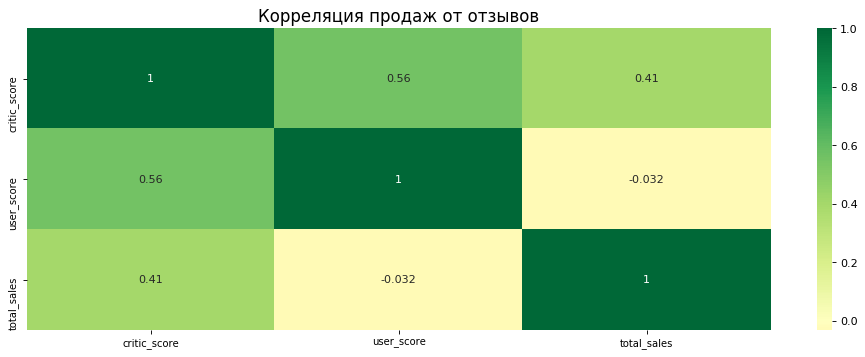

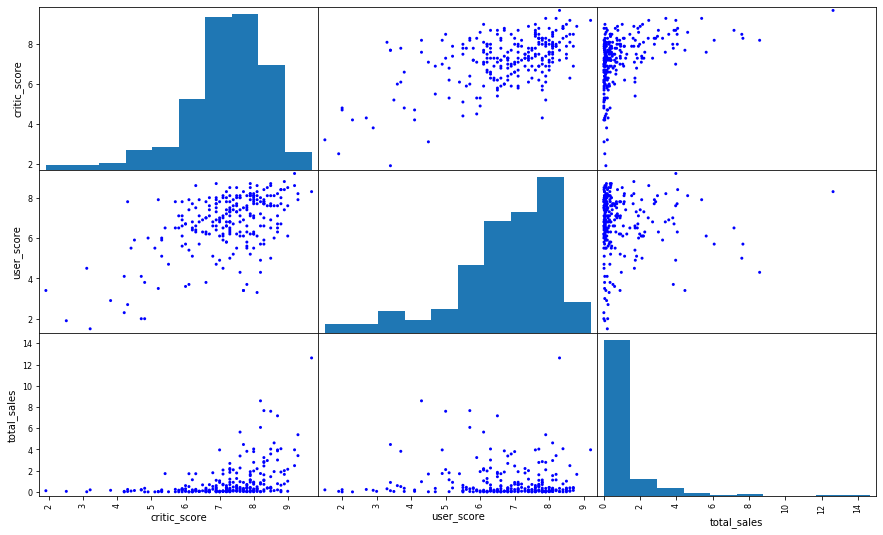

In [32]:
plt.figure(figsize=(15,5), dpi= 80)
sns.heatmap(ps4_score_influence.corr(), xticklabels=ps4_score_influence.corr().columns, yticklabels=ps4_score_influence.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Корреляция продаж от отзывов', fontsize=15)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

pd.plotting.scatter_matrix(ps4_score_influence, figsize=(15, 9), alpha=1, c='b');

> - Корреляция в 0.41 между отзывами критиков и продажами говорит о наличии связи, однако не слишком сильной. Выходит, увеличение оценки критиков сопровождается увеличением в продажах, но так бывает не всегда.  
- В тоже время корреляция между отзывами критиков и пользователей равна 0.56, говорит что пользователи и критики зачастую сходятся в оценке, но не всегда  
- Корреляция между отзывами пользователей и продажами не влияют друг на друга

### Определим общее распределение игр по жанрам.

Построим сводную таблицу по продажам и количеству выпущенных игр по жанрам 

In [33]:
sales_per_genre = (df.query('year_of_release >= 2012')
                    .pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'count']))
sales_per_genre.columns = ['Продажи, $ млн.', 'Количество игр, шт.']
sales_per_genre.reset_index(inplace=True)
sales_per_genre.sort_values(by='Продажи, $ млн.', inplace=True, ascending=False)
sales_per_genre

,genre,"Продажи, $ млн.","Количество игр, шт."
0,Action,441.52,1032
8,Shooter,304.80,236
7,Role-Playing,193.09,372
10,Sports,181.09,269
3,Misc,85.04,192
4,Platform,61.00,85
6,Racing,53.59,116
2,Fighting,44.49,109
9,Simulation,35.61,82
1,Adventure,29.52,303


И графики продаж и количеству выпущенных игр по сводной таблице

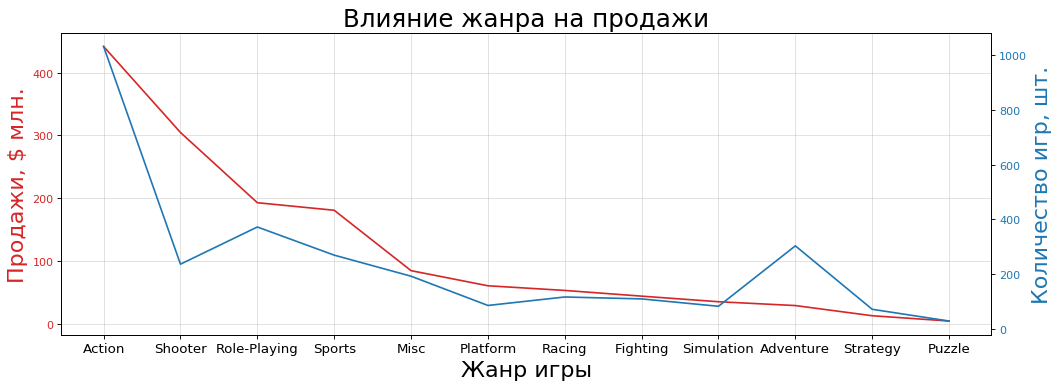

In [34]:
x = sales_per_genre['genre']
y1 = sales_per_genre['Продажи, $ млн.']
y2 = sales_per_genre['Количество игр, шт.']

fig, ax1 = plt.subplots(1,1,figsize=(15,5), dpi= 80)
ax1.plot(x, y1, color='tab:red')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='tab:blue')

# ax1 (left Y axis)
ax1.set_xlabel('Жанр игры', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Продажи, $ млн.', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel('Количество игр, шт.', color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_title('Влияние жанра на продажи', fontsize=22)

plt.show()

Самые прибыльные жанры Action, Shooter, Role-Playing, Sports  
Самые низкие продажи Pazzle, Strategy, Adventure, Simulation

### Выводы по главе 3:

- в общем срок нахождения платформы на рынке около 11 лет. В то же время с 2012 года резкий спад по количеству выпущенных игр и продаж от них. Пользователи стали более требовательны к качеству игр и разработчики перешли от количества к качеству самих игр
- Из всех платформ только PS4, XOne на восходязем тренде, остальные в нисходящем тренде.
- Потенциально прибыльные платформы PS4, XOne, 3DS, PS3, WiiU, X360, PC, PSV
- По продажам лидируют PS3, PS4, WiiU, X360, XOne
- Отзывы критиков вляиют на продажи(как правило они выходят до релиза и разогревают интерес к ингре), но не всегда. А отзывы пользователей не влияют на продажи, т.к. часто выходят долгожданныеи прибыльные, но провальные игры
- Высокие продажи в жанрах Action, Shooter, Role-Playing, Sports, низкие в Pazzle, Strategy, Adventure, Simulation

## Глава 4. Определение портрета пользователя по разным регионам

Напишем следующие функции:
- top_5_platforms_of_region - строит распределение по топ-5 платформам региона
- top_5_genres_of_region - строит распределение по топ-5 жанрам региона
- influence_ESRB - влияние рейтинга ESRB на продажи

In [35]:
def top_5_platforms_of_region(df, column):
    top_5_platforms = df.groupby('platform')[column].sum().sort_values(ascending=False).head()
    top_5_platforms
    (top_5_platforms.plot(autopct='%1.1f%%', kind='pie', title='Доля продаж по платформам', legend=False, figsize=(7, 7))
                    .set(ylabel=''));
    return top_5_platforms

In [36]:
def top_5_genres_of_region(df, column):
    top_5_genres = df.groupby('genre')[column].sum().sort_values(ascending=False).head()
    top_5_genres
    (top_5_genres.plot(autopct='%1.1f%%', kind='pie', title='Доля продаж по жанрам', legend=False, figsize=(7, 7))
                 .set(ylabel=''));
    return top_5_genres

In [37]:
def influence_ESRB(df, column):
    sales_per_rating = df.pivot_table(index='rating', values=column, aggfunc=['sum', 'count'])
    sales_per_rating.columns = ['Продажи, $ млн.', 'Количество игр, шт.']
    sales_per_rating.reset_index(inplace=True)
    sales_per_rating.sort_values(by='Продажи, $ млн.', inplace=True)
    
    x = sales_per_rating['rating']
    y1 = sales_per_rating['Продажи, $ млн.']
    y2 = sales_per_rating['Количество игр, шт.']

    fig, ax1 = plt.subplots(1,1,figsize=(15,5), dpi= 80)
    ax1.plot(x, y1, color='tab:red')

    ax2 = ax1.twinx()
    ax2.plot(x, y2, color='tab:blue')

    # ax1 (left Y axis)
    ax1.set_xlabel('Рейтинг ESRB', fontsize=20)
    ax1.tick_params(axis='x', rotation=0, labelsize=12)
    ax1.set_ylabel('Продажи, $ млн.', color='tab:red', fontsize=20)
    ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
    ax1.grid(alpha=.4)

    # ax2 (right Y axis)
    ax2.set_ylabel('Количество игр, шт.', color='tab:blue', fontsize=20)
    ax2.tick_params(axis='y', labelcolor='tab:blue')
    ax2.set_title('Влияние рейтинга ESRB на продажи', fontsize=22)

    plt.show()
    
    return sales_per_rating

### Регион NA (North America)

Построим сводную таблицу по продажам игр для региона Северная Америка

In [38]:
na_region = (df.query('year_of_release >= 2012 & na_sales != 0 ')
             .loc[:, ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'rating']])
na_region

,name,platform,year_of_release,genre,na_sales,rating
16,Grand Theft Auto V,PS3,2013,Action,7.02,M
23,Grand Theft Auto V,X360,2013,Action,9.66,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,NaN
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,NaN
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,M
...,...,...,...,...,...,...
16615,Balloon Pop 2,3DS,2012,Puzzle,0.01,E
16618,Xblaze: Lost Memories,PSV,2015,Adventure,0.01,M
16660,Prison Architect,XOne,2016,Action,0.01,NaN
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,M


Топ-5 по продажам платформ:

platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      56.15
Name: na_sales, dtype: float64

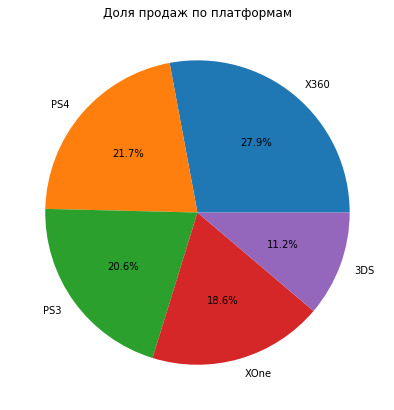

In [39]:
top_5_platforms_of_region(na_region, 'na_sales')

Топ-5 по продажам жанров:

genre
Action          178.02
Shooter         144.81
Sports           81.53
Role-Playing     64.11
Misc             38.19
Name: na_sales, dtype: float64

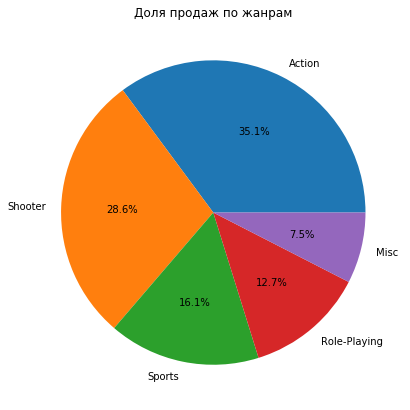

In [40]:
top_5_genres_of_region(na_region, 'na_sales')

Влияние рейтинга ESRB на продажи:

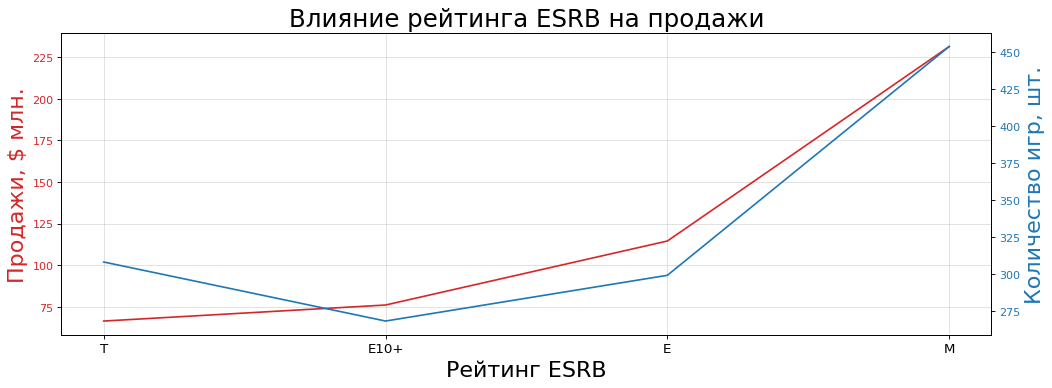

,rating,"Продажи, $ млн.","Количество игр, шт."
3,T,66.31,308
1,E10+,75.96,268
0,E,114.49,299
2,M,231.57,454


In [41]:
influence_ESRB(na_region, 'na_sales')

>Пользователи в Северной Америке предпочитают, в большей части, платформы X360, меньше PS3, PS4, XOne.  
Жанры Action и Shooter  
Максимальный по продажам рейтинг ESRB: "M" - для взрослых


### Регион EU (Europa)

Проделаем тоже самое для региона Европа:

In [42]:
eu_region = (df.query('year_of_release >= 2012 & eu_sales != 0 ')
             .loc[:, ['name', 'platform', 'year_of_release', 'genre', 'eu_sales', 'rating']])
eu_region

,name,platform,year_of_release,genre,eu_sales,rating
16,Grand Theft Auto V,PS3,2013,Action,9.09,M
23,Grand Theft Auto V,X360,2013,Action,5.14,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,5.86,NaN
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,4.19,NaN
34,Call of Duty: Black Ops II,PS3,2012,Shooter,5.73,M
...,...,...,...,...,...,...
16645,ZombiU,XOne,2016,Action,0.01,NaN
16652,Fast Racing Neo,WiiU,2016,Action,0.01,E
16654,Ben 10 Omniverse 2,X360,2013,Action,0.01,E10+
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.01,NaN


platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.85
Name: eu_sales, dtype: float64

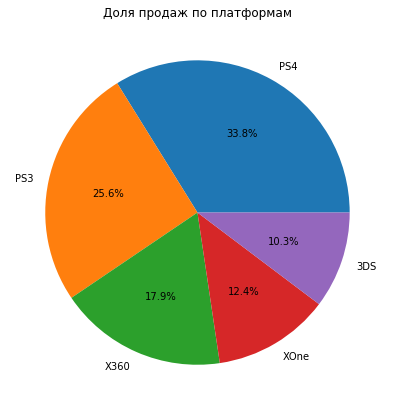

In [43]:
top_5_platforms_of_region(eu_region, 'eu_sales')

genre
Action          159.53
Shooter         113.49
Sports           69.09
Role-Playing     48.58
Racing           27.29
Name: eu_sales, dtype: float64

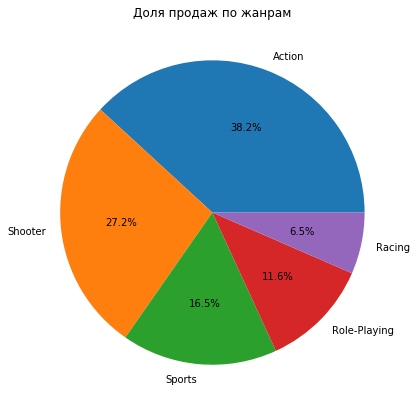

In [44]:
top_5_genres_of_region(eu_region, 'eu_sales')

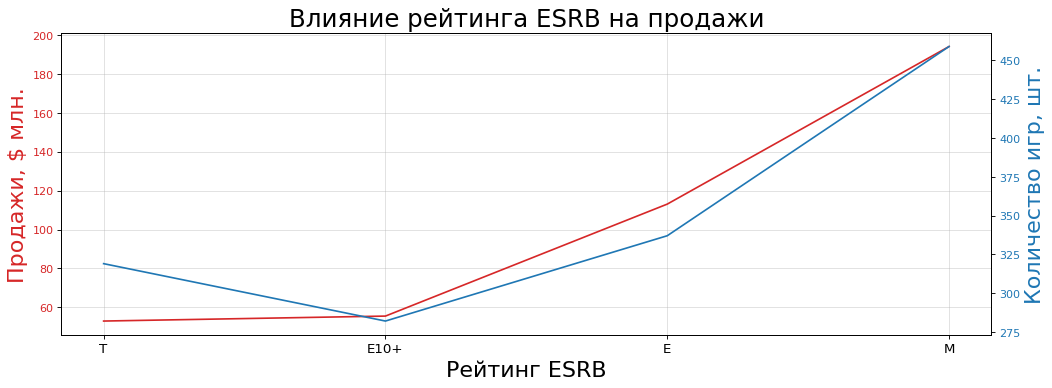

,rating,"Продажи, $ млн.","Количество игр, шт."
3,T,53.01,319
1,E10+,55.56,282
0,E,113.05,337
2,M,193.96,459


In [45]:
influence_ESRB(eu_region, 'eu_sales')

>Пользователи в Европе предпочитают, в большей части, платформы PS4, PS3.  
Жанры Action и Shooter   
Максимальный по продажам рейтинг ESRB: "M" - для взрослых

### Регион JP (Japan)

Проделаем тоже самое для региона Япония:

In [46]:
jp_region = (df.query('year_of_release >= 2012 & jp_sales != 0 ')
             .loc[:, ['name', 'platform', 'year_of_release', 'genre', 'jp_sales', 'rating']])
jp_region

,name,platform,year_of_release,genre,jp_sales,rating
16,Grand Theft Auto V,PS3,2013,Action,0.98,M
23,Grand Theft Auto V,X360,2013,Action,0.06,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,0.36,NaN
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,4.35,NaN
34,Call of Duty: Black Ops II,PS3,2012,Shooter,0.65,M
...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.01,NaN
16707,Aiyoku no Eustia,PSV,2014,Misc,0.01,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.01,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.01,NaN


platform
3DS     87.84
PS3     35.29
PSV     21.11
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64

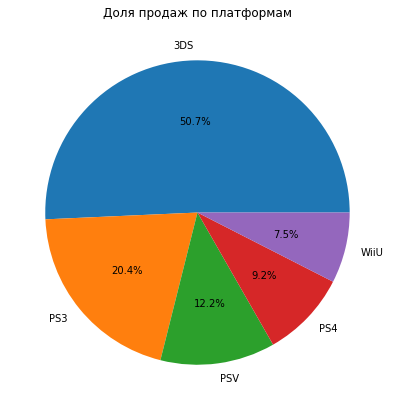

In [47]:
top_5_platforms_of_region(jp_region, 'jp_sales')

genre
Role-Playing    65.54
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64

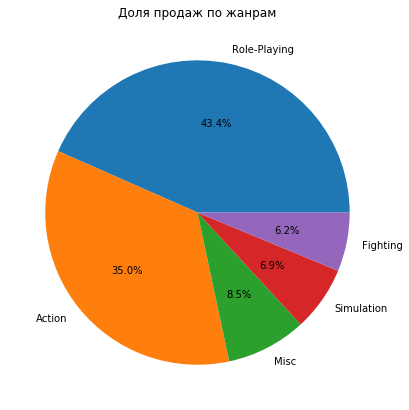

In [48]:
top_5_genres_of_region(jp_region, 'jp_sales')

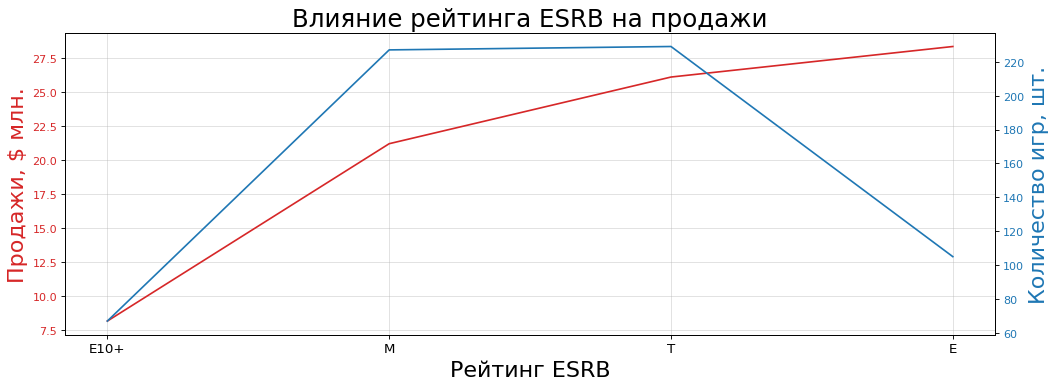

,rating,"Продажи, $ млн.","Количество игр, шт."
1,E10+,8.19,67
2,M,21.20,227
3,T,26.09,229
0,E,28.33,105


In [49]:
influence_ESRB(jp_region, 'jp_sales')

>Пользователи в Японии предпочитают, в большей части, платформу 3DS.  
Жанры Role-Playing и Action   
Максимальный по продажам рейтинг ESRB: "Е" - для всех(и дети), "Т" - для подростков

### Регион OW (Other world)

Проделаем тоже самое для остального мира:

In [50]:
other_world_region = (df.query('year_of_release >= 2012 & other_sales != 0 ')
             .loc[:, ['name', 'platform', 'year_of_release', 'genre', 'other_sales', 'rating']])
other_world_region

,name,platform,year_of_release,genre,other_sales,rating
16,Grand Theft Auto V,PS3,2013,Action,3.96,M
23,Grand Theft Auto V,X360,2013,Action,1.41,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,2.38,NaN
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,0.78,NaN
34,Call of Duty: Black Ops II,PS3,2012,Shooter,2.42,M
...,...,...,...,...,...,...
14707,Superdimension Neptune vs Sega Hard Girls,PSV,2016,Role-Playing,0.01,T
14827,Putty Squad,PSV,2013,Platform,0.01,E10+
14871,Resident Evil 5 HD,PS4,2016,Action,0.01,NaN
14872,Aegis of Earth: Protonovus Assault,PSV,2016,Action,0.01,T


platform
PS4     48.35
PS3     43.26
X360    20.40
XOne    14.27
3DS      8.96
Name: other_sales, dtype: float64

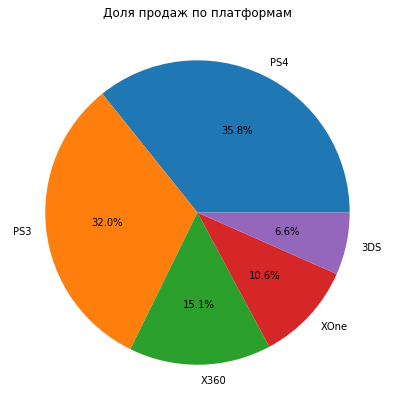

In [51]:
top_5_platforms_of_region(other_world_region, 'other_sales')

genre
Action          51.17
Shooter         37.27
Sports          22.44
Role-Playing    14.86
Misc             7.67
Name: other_sales, dtype: float64

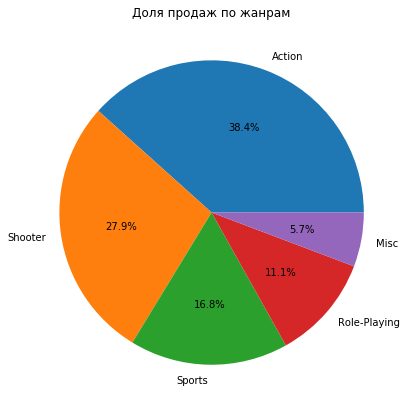

In [52]:
top_5_genres_of_region(other_world_region, 'other_sales')

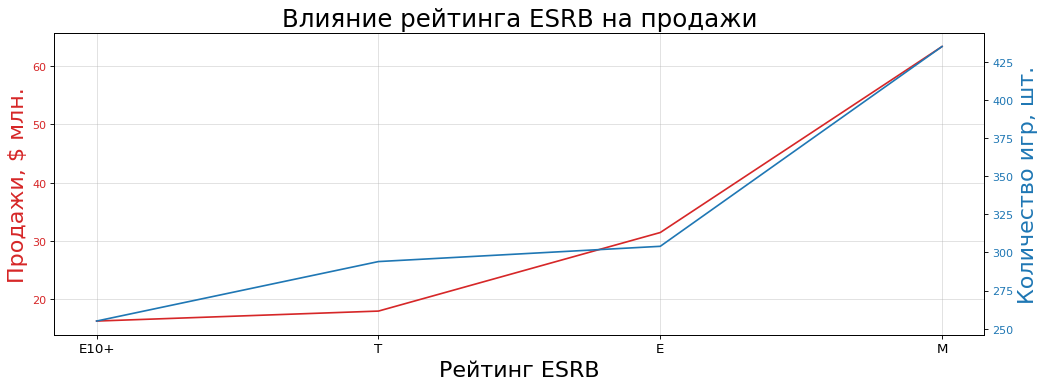

,rating,"Продажи, $ млн.","Количество игр, шт."
1,E10+,16.27,255
3,T,17.98,294
0,E,31.46,304
2,M,63.38,435


In [53]:
influence_ESRB(other_world_region, 'other_sales')

>Пользователи в остальном мире предпочитают, в большей части, платформы PS4, PS3.  
Жанры Action и Shooter   
Максимальный по продажам рейтинг ESRB: "M" - для взрослых  

### Выводы по главе 4:

Портрет пользователя в NA:
- предпочитает играть в X360, меньше PS3, PS4, XOne
- любит жанры Action и Shooter с рейтингом для взрослых
Пользователи характеризируются склонностью к играм с насилием, откровенными сценами, ненормативной лексикой, более реалистичные игры. Используют в основном приставки Microsoft X360 и, набирающую популярность следующую модель XOne.  

Портрет пользователя в EU:
- предпочитает играть в платформы PS4, PS3
- любит жанры Action и Shooter с рейтингом для взрослых
Пользователи характеризируются склонностью к играм с насилием, откровенными сценами, ненормативной лексикой, более реалистичные игры. Используют в основном приставки Sony PS3 и, набирающую популярность следующую модель PS4.

Портрет пользователя в JP:
- предпочитает играть в платформу 3DS
- любит жанры Role-Playing и Action с рейтингом "Е" - для всех(и дети), "Т" - для подростков
Пользователи характеризируются склонностью к играм фентези, с отсутствием ярко выраженного насилия, предпочитая игры рейтинга для всех возрастов. Используют в основном приставки Nintendo 3DS.

Портрет пользователя в OW:
- характеризуется портретом пользователей из Европы

## Глава 5. Проверка гипотез

### Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Найдем средние пользовательские рейтинги платформ Xbox One и PC

In [54]:
xone_user_rating = df.query('year_of_release >= 2012 and platform == "XOne"')['user_score'].dropna()
xone_user_rating.mean()

6.521428571428572

In [55]:
pc_user_rating = df.query('year_of_release >= 2012 and platform == "PC"')['user_score'].dropna()
pc_user_rating.mean()

6.4286407766990274

Сформируем нулевую гипотезу H₀ - "Средние пользовательские рейтинги платформ Xbox One и PC равны". Тогда альтернативная гипотеза H₁ формирует следующие утверждение: "Средние пользовательские рейтинги платформ Xbox One и PC различается"

In [56]:
alpha = .05 # критический уровень статистической значимости, если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(xone_user_rating, pc_user_rating, equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Полученное p-значение не позволяет отвергнуть нулевую гипотезу и говорит о том, что "Средние пользовательские рейтинги платформ Xbox One и PC равны". С вероятностью в 55% такое различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между cредние пользовательскими рейтингами платформ Xbox One и PC (включая тех, кто не поставил рейтинг игре).

### Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports разные.

Сформируем нулевую гипотезу H₀ - "Средние пользовательские рейтинги жанров Action и Sports не отличаются". Тогда альтернативная гипотеза H₁ формирует следующие утверждение: "Средние пользовательские рейтинги жанров Action и Sports разные"

In [57]:
action_user_rating = df.query('year_of_release >= 2012 and genre == "Action"')['user_score'].dropna()
action_user_rating.mean()

6.824427480916031

In [58]:
sports_user_rating = df.query('year_of_release >= 2012 and genre == "Sports"')['user_score'].dropna()
sports_user_rating.mean()

5.455897435897437

In [59]:
alpha = .05 # критический уровень статистической значимости, если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(action_user_rating, sports_user_rating, equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.517102771333629e-26
Отвергаем нулевую гипотезу


Полученное p-значение позволяет отвергнуть нулевую гипотезу и говорит о том, что "Средние пользовательские рейтинги жанров Action и Sports разные", рейтинг жанра Action выше, чем у жанра Sports.    
Получить подтверждение нулевой гипотезы ничтожно мало(гораздо меньше критического уровеня статистической значимости в 0.05)

### Выводы по главе 5:
Проверка 1 гипотезы показала, что cредние пользовательские рейтинги платформ Xbox One и PC равны, что предполагает такое же распределение у тех пользователей, кто не поставил рейтинг игре.  
Проверка 2 гипотезы показала, что Средние пользовательские рейтинги жанров Action и Sports разные, у жанра Action оценки пользователей выше, что предполагает о таком же распределение в генеральной совокупности(т.е. все пользователи игры, включая не поставивших рейтинг игре)

## Глава 6. Общий вывод

Исходя из полученных данных исследования можно сделать следующие выводы о продажах в 2017 году:
- Актуальный период для прогноза 5 лет, т.е. с 2012 года, при том что каждая платформа проводит около 11 лет на рынке, пока ее полностью не заменит следующая модель или попросту выйдет из моды. Пользователи стали более требовательны к качеству игр и разработчики перешли от количества к качеству самих игр.
- Из всех платформ только PS4, XOne на восходящем тренде, остальные в нисходящем тренде. Что не удивительно, т.к. платформы вышли недавно.
- Потенциально прибыльные платформы PS4, XOne, 3DS, PS3, WiiU, X360, PC, PSV
- По продажам лидируют PS3, PS4, WiiU, X360, XOne
- Отзывы критиков вляиют на продажи(как правило они выходят до релиза и разогревают интерес к ингре), но не всегда. А отзывы пользователей не влияют на продажи, т.к. часто выходят долгожданныеи прибыльные, но провальные игры
- Самые высокие продажи в жанрах Action, Shooter, Role-Playing, Sports, низкие в Pazzle, Strategy, Adventure, Simulation
- Необходимо учитывать портрет пользователя для рекламных компаниях в каждом регионе.  
 Для NA предпочтительнее:
 - платформы X360, PS3, PS4, XOne
 - жанры Action и Shooter с рейтингом для взрослых

 Для EU и "Остального мира" предпочтительнее:
 - платформы PS4, PS3
 - жанры Action и Shooter с рейтингом для взрослых

 Для JP предпочтительнее:
 - платформа 3DS
 - жанры Role-Playing и Action с рейтингом "Е" - для всех(и дети), "Т" - для подростков
- Проверенная гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" подтвердилась, что вероятно говорит о том, что игры на Xbox One и PC в среднем очень близки по ожиданиям пользователей и вероятно много игр выпускается сразу на XOne и PC
- Проверенная гипотеза "Средние пользовательские рейтинги жанров Action и Sports разные" подтвердилась. Пользователи любят больше Action, а разработчики игр дают пользователям качественные игры, в то время как Sports игры не оправдывают ожидания пользователей так же как Action жанр. 
